## Project Objective
Statistical Analysis of Business Data. Explore the dataset and extract insights from the data.

Key Questions to answer:
1.	Explore the dataset and extract insights using Exploratory Data Analysis.
2.	Prove(or disprove) that the medical claims made by the people who smoke is greater than those who don't?
3.	Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
4.	Is the proportion of smokers significantly different across different regions?
5.	Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.


## Assumptions
The Health Insurance Customer's data is a simple random sample from the population data.

### About the data-

**AxisInsurance.csv** - contains information about customers of the Axis Health Insurance.
1.	Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
2.	Sex - This is the policy holder's gender, either male or female.
3.	BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
4.	Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
5.	Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
6.	Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
7.	Charges - Individual medical costs billed by health insurance 

### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AxisInsurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1) There are 1338 rows and 7 columns
2) There are no null values
3) There are 2 - int64 variables, 2 - float64 variables and 3 - object variables

### Converting Variables

In [7]:
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

### Check for missing values

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no missing values in any of the variables.

### Five point summary of continuous variables

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* Data looks legitimate as all the statistics seem reasonable
* Looking at the age column, data looks representative of the true age distribution of the adult population
* Very few people have more than 2 children. 75% of the people have 2 or less children
* The claimed amount is higly skewed as most people would require basic medicare and only few suffer from diseases which cost more.

### Summary of categorical variables

In [10]:
df.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


* The data contains both male and female insurance holders
* The number of smokers in the data is much less than the non smokers.
* The insurance holders from southeast region of US are more frequent than the others.

## EDA

### Univariate Analysis

In [11]:
def histogram_boxplot(data,ylabel=None, xlabel=None, title=None, font_scale=2, figsize=(15,7), bins=None):
    mean = np.mean(data)
    sns.set_theme(font_scale = font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.25,0.75)}, figsize = figsize)
    sns.boxplot(x = data, ax=ax_box2, showmeans=True, color='violet', orient='h')
    if bins:
        sns.histplot(data, kde=False, ax=ax_hist2, bins = bins, color='black')
    else:
        sns.histplot(data, kde=False, ax=ax_hist2, color='black')

    ax_hist2.axvline(mean, color='g', linestyle='--')

    if xlabel:
        ax_hist2.set(xlabel=xlabel)
    if title:
        ax_box2.set(title=title)
    if ylabel:
        ax_box2.set(ylabel=ylabel)
    plt.show()

### Age

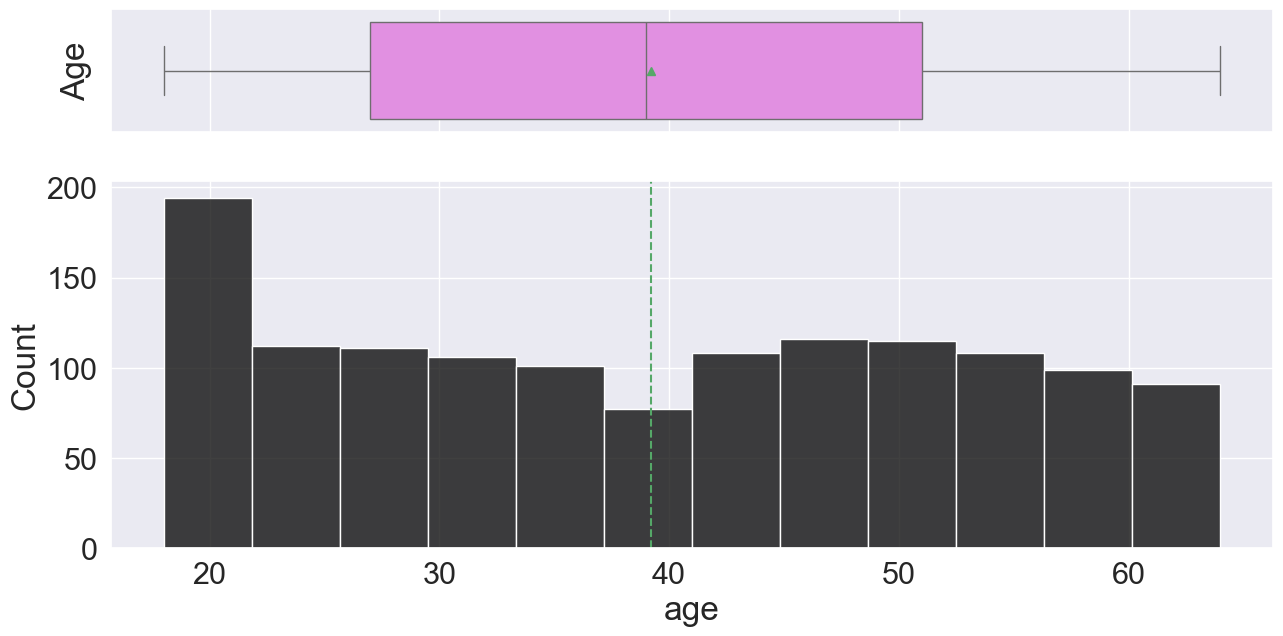

In [12]:
histogram_boxplot(df["age"], ylabel='Age')

* We see that the age variable is uniformly distributed, with both mean and median at 40 years.

### BMI

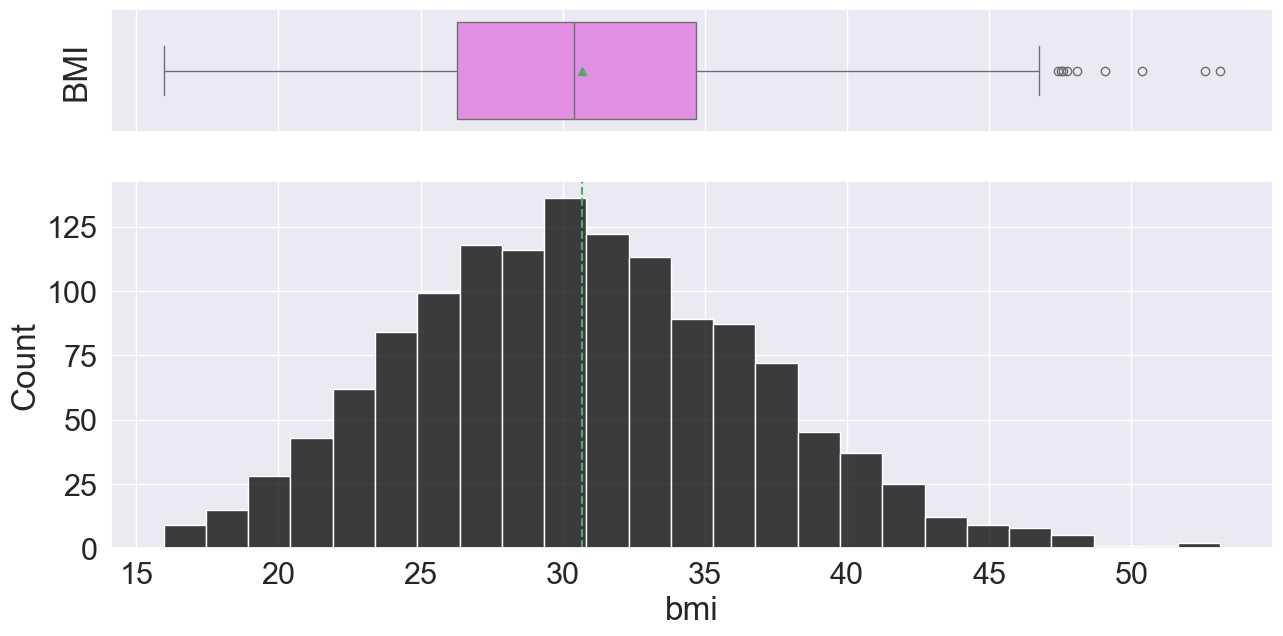

In [13]:
histogram_boxplot(df['bmi'], ylabel='BMI')

* We see that the BMI variable is normally distributed 

### Children

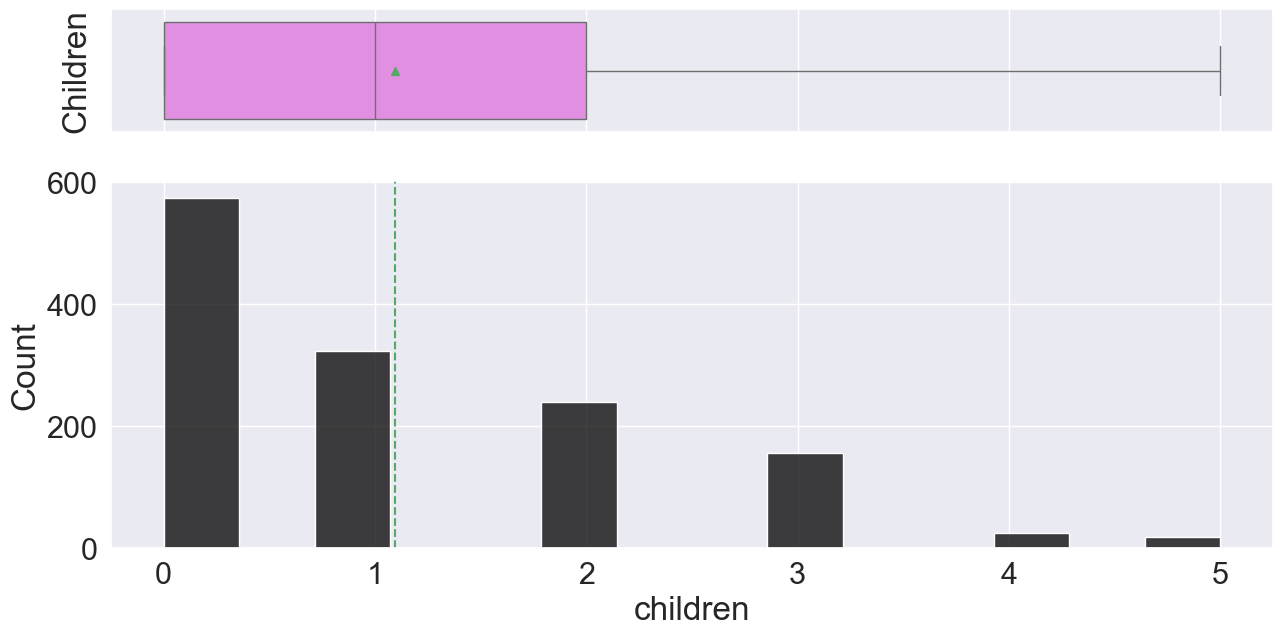

In [14]:
histogram_boxplot(df['children'], ylabel='Children')

* We see that the children variable is right skewed.
* The plot suggests that we should convert the children variable to 'categorical' variable.

In [15]:
df['children'] = df['children'].astype('category')

### Charges

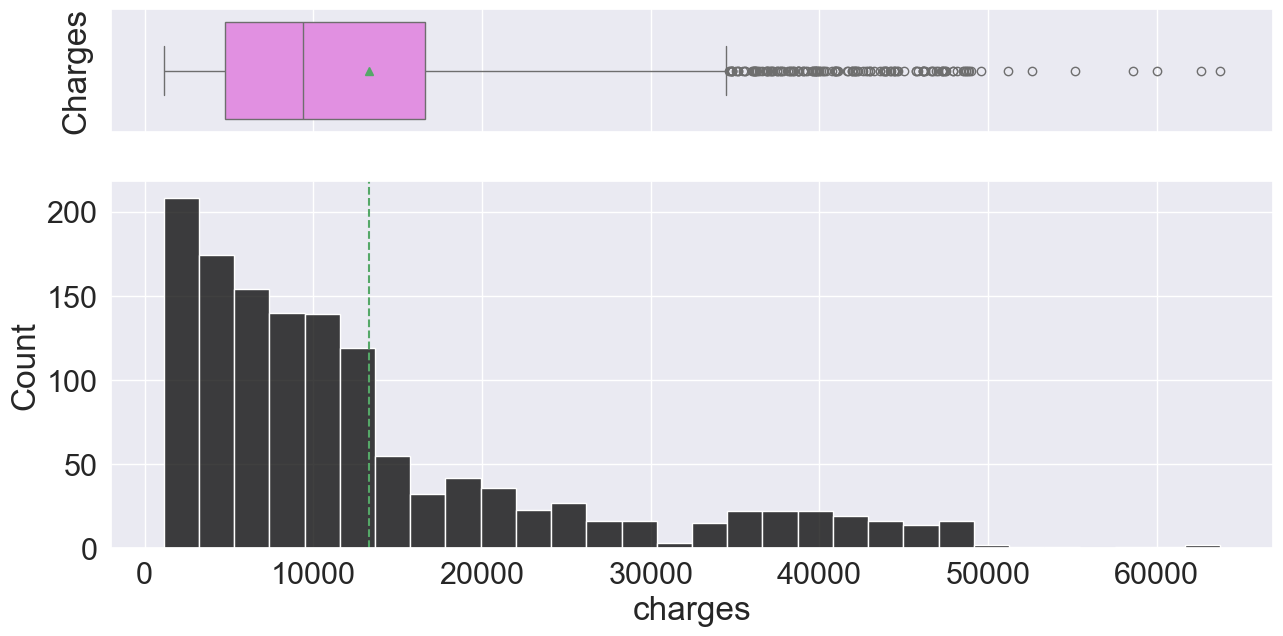

In [16]:
histogram_boxplot(df['charges'], ylabel='Charges')

* We see that the charges varibale is left skewed and has ot of outliers.
* By the outliers being at the right end we can say that there are some people who pay more for their medical expenses.

In [17]:
def perc_on_bars(plot, feature):
    total = len(feature)
    for p in ax.patches: #ax.patches is alist of all the bars in the barplot
        percent = '{:.1f}%'.format(100*p.get_height()/total)  # p.get_height gives the height of the bar
        x = p.get_x() + p.get_width()/(3) # p.get_x() gives the starting x position of the bar, p.get_width() gives the width of the bar
        y = p.get_y() + p.get_height()/2 # p.get_y() gives the starting y position of the bar(usually zero in barplots), p.get_wheight() gives the height of the bar
        ax.annotate(percent, (x,y), size=20)
    plt.show()

### Sex

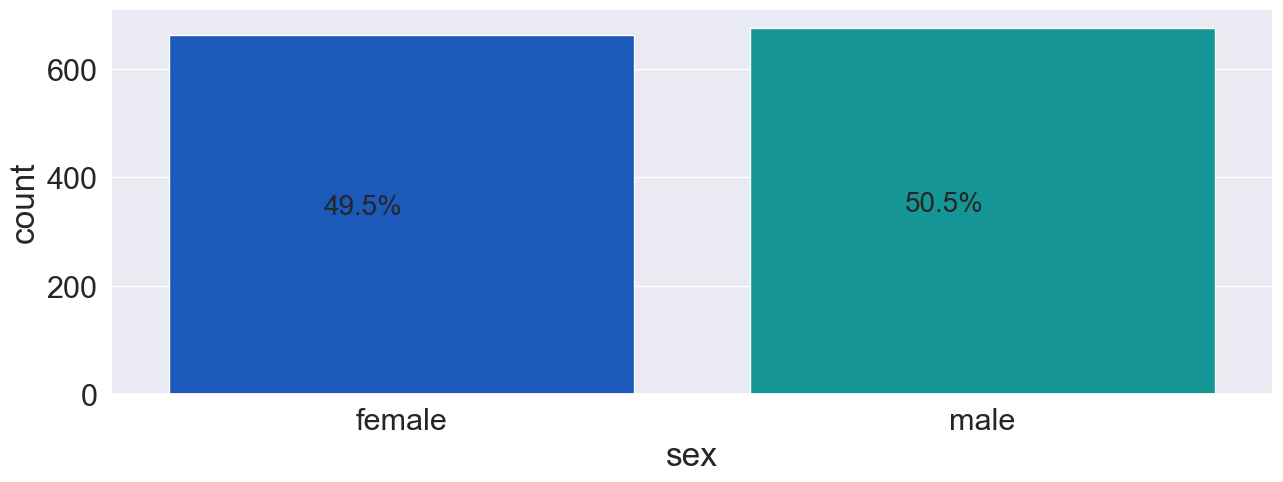

In [18]:
plt.figure(figsize= (15,5))
ax = sns.countplot(x='sex',data=df,palette='winter')
perc_on_bars(ax, df['sex'])

### Children

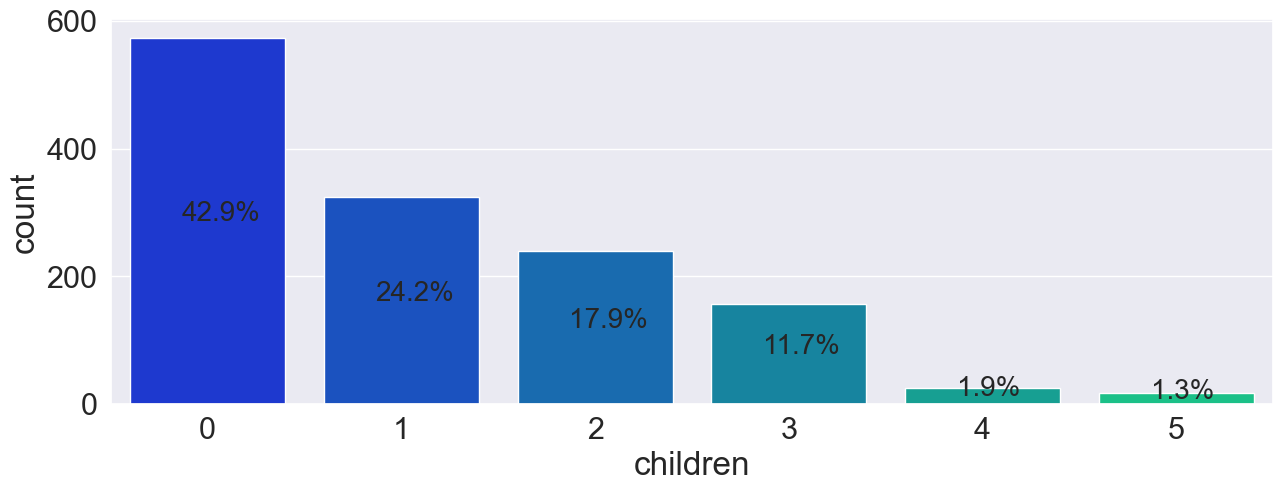

In [19]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='children',data=df, palette='winter')
perc_on_bars(ax,df['children'])

* We see that nearly 42% insurance holders do not have any kids.

### Smoker

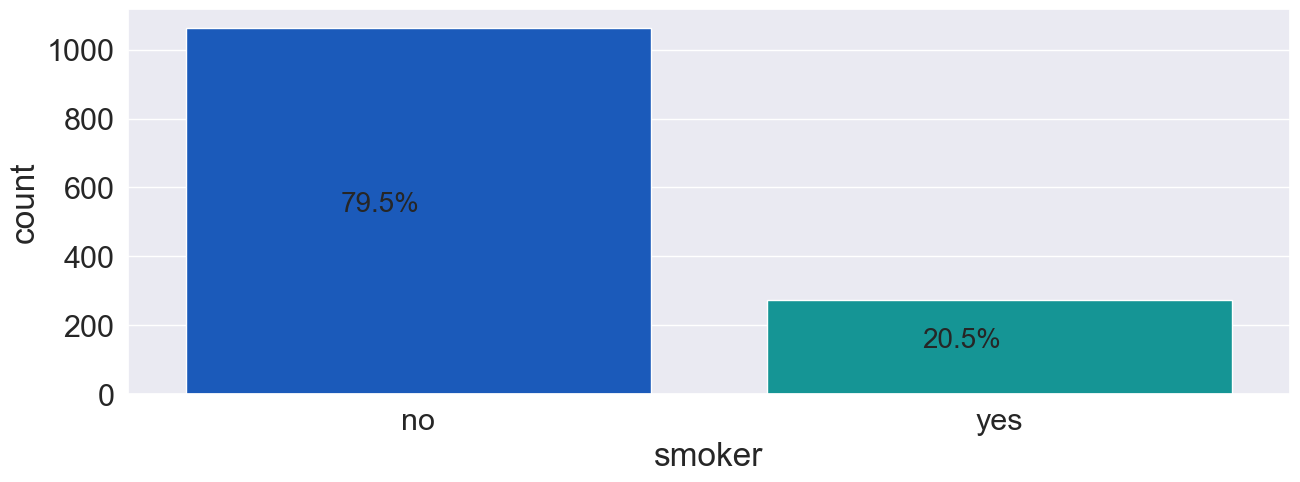

In [20]:
plt.figure(figsize=(15,5))
ax= sns.countplot(x='smoker', data=df, palette='winter')
perc_on_bars(ax, df['smoker'])

* we see that majority of the insurance holders non smokers.

### Region

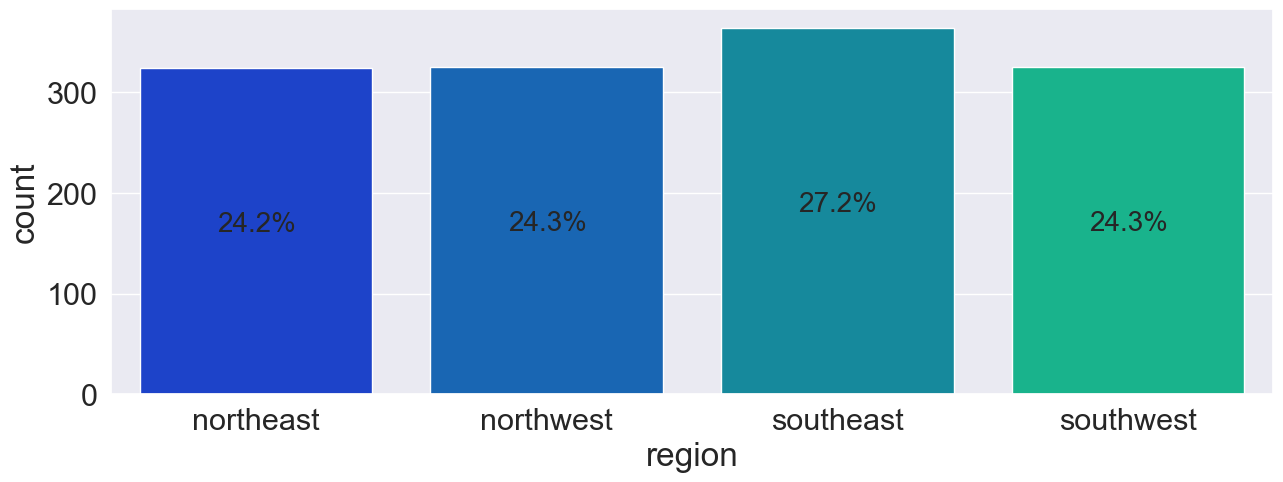

In [21]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='region', data=df, palette='winter')
perc_on_bars(ax, df['region'])

* We see that the distribution of the regions across US is uniform in nature somewhat, but the region southeast is aproxx. 3% more compared to other regions we have to see if this variation is statisticaly significant.

## Bivariate Analysis

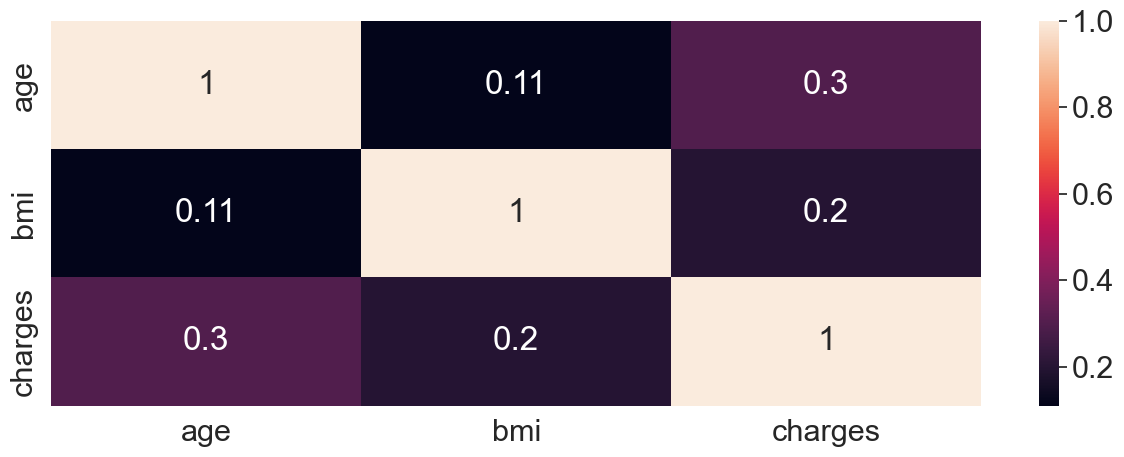

In [22]:
plt.figure(figsize=(15,5))
sns.heatmap(df.select_dtypes('number').corr(), annot=True)
plt.show()

* The correlation between numeric variable is positive in nature but not that huge.

<Figure size 1500x500 with 0 Axes>

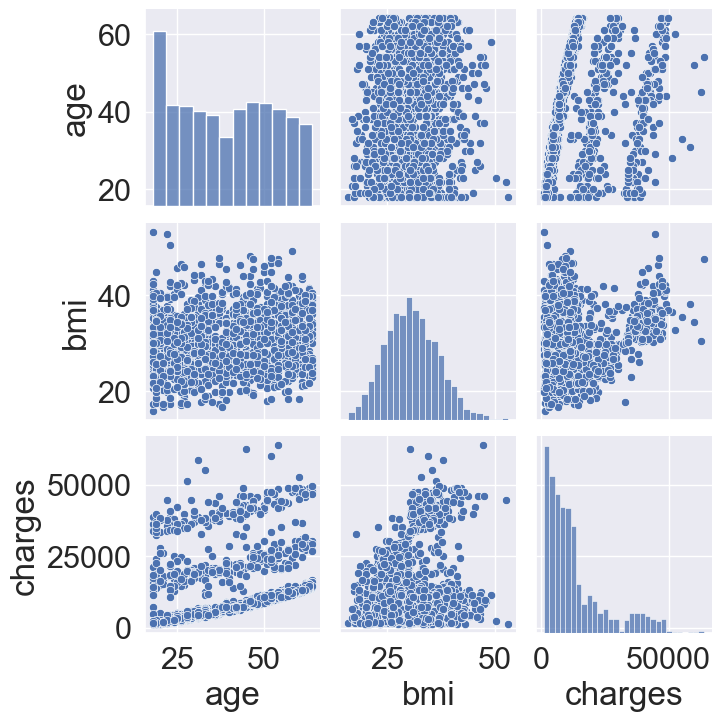

In [23]:
plt.figure(figsize=(15,5))
sns.pairplot(df.select_dtypes('number'))
plt.show()

## Business Questions 

### Prove(or disprove)  that the medical claims made by the people who smoke is greater than those who don't? 

In [25]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

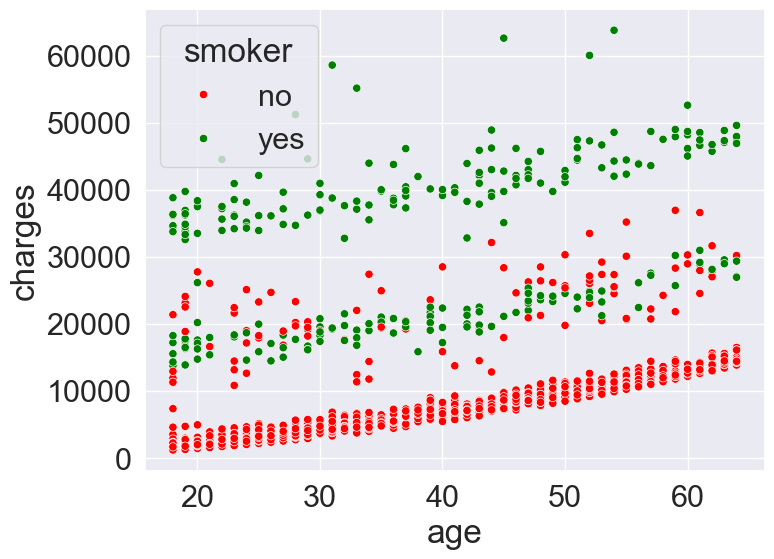

In [29]:
# Scatter plot to visualy find evidence of dependency between smoking and non smoking medical costs for different ages
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette=['red','green'])
plt.show()

* We see that non-smokers have lower medical bill claims compared to smokers.
* We will have to perform a two sample t-test(independent) to check if the eman charges of smokers is significantly greater than non smokers.

#### T-test to check dependency of charges on smoking attribute

Null Hypothesis = H0 = "Mean charges of smokers is less than or equal to non-smokers"

Alternate Hypothesis = Ha = "Mean charges of smokers is greater than non-smokers"

This is a one tailed t-test

In [42]:
H0 = "Mean charges of smokers is less than or equal to non-smokers"
Ha = "Mean charges of smokers is greater than non-smokers"

x = np.array(df.loc[df['smoker'] == 'yes', ['charges']])
y = np.array(df.loc[df['smoker']=='no', ['charges']])

test_stat, p_value = stats.ttest_ind(x,y,alternative='greater')

In [44]:
print("Tstat:",test_stat,"p_value:",p_value)

Tstat: [46.66492117] p_value: [4.13571792e-283]


* As the p_value is less than 0.05 we reject the Null Hypothesis. Thus we have statistical evidence that the medical claims made by smokers are higher than the claims made by non-smokers.

### Prove (or disprove) with statistical evidence that BMI of females is different from that of males.

In [46]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [55]:
mean_female = np.mean(df.loc[df['sex'] == 'female', ['bmi']])
mean_male = np.mean(df.loc[df['sex'] == 'male', ['bmi']])

print('The mean  BMI of female is',round(mean_female,3))
print('The mean BMI of male is',round(mean_male,3))

The mean  BMI of female is 30.378
The mean BMI of male is 30.943


* In the sample the mean BMI of male is slightly greater the mean BMI of female but this small difference does not give us evidence to say hat BMI of male is greater than female, and ence we will be going ahead with some statistical tests.

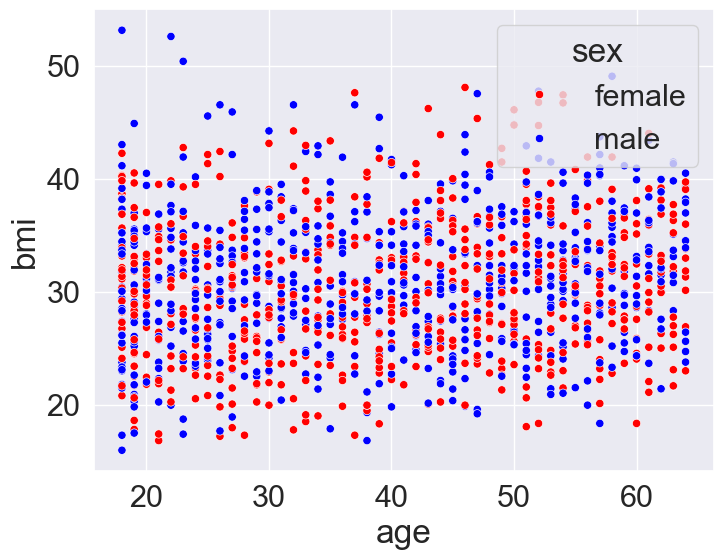

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='bmi', data=df, hue='sex', palette=['red','blue'])
plt.show()

* Visually, there is no relation between BMI and gender.

#### T-test to check dependency of BMI on gender

Null Hypothesis = H0 = "Mean BMI of female is same as that of male"

Alternate Hypothesis = Ha = "Mean BMI of females is different from amle"

This is a two tailed t-test

In [60]:
x = np.array(df.loc[df['sex'] == 'male', 'bmi'])
y = np.array(df.loc[df['sex'] == 'female', 'bmi'])

test_stat, p_value = stats.ttest_ind(x,y,alternative='two-sided')

print('Tstat =',test_stat,'p_value =',p_value)

Tstat = 1.696752635752224 p_value = 0.08997637178984932


* As the p_value is grater than 0.05 we fail to reject the Null Hypothesis. Hence we can conclude that we donot have enough statistical evidence to conclude that BMI of female's is not that different from BMI of male's

### Is the proportion of smokers significantly different across different regions?


In [66]:
crosstab = pd.crosstab(df['smoker'], df['region'])
crosstab

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


<Axes: xlabel='smoker'>

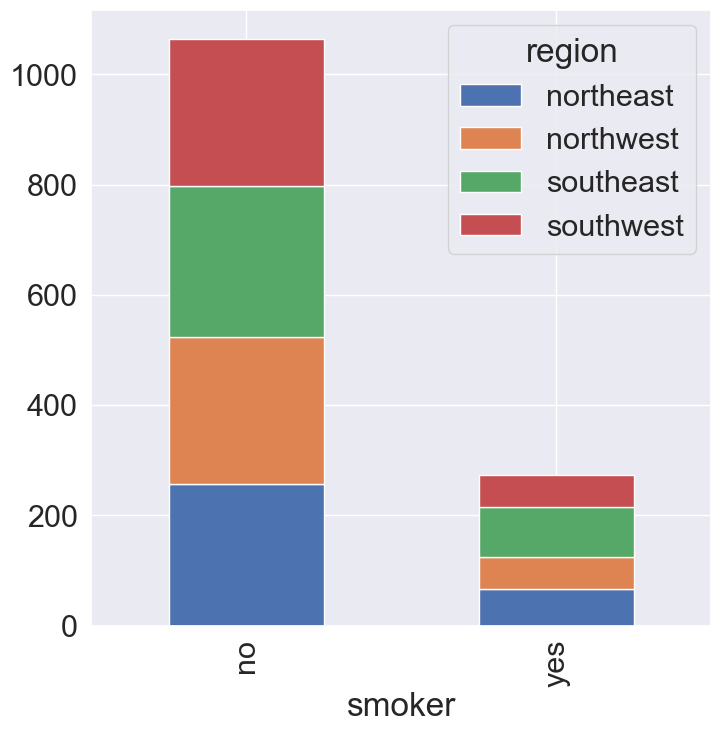

In [63]:
pd.crosstab(df['smoker'], df['region']).plot(kind='bar',figsize=(8,8), stacked=True)

* We see that the number of smokers in southeast is a slightly larger compared to other regions.

#### Chi-sq test to check if smoking habits are different for different regions

Null Hypothesis = Ho = "Region has no effect on smoking habits" 

Alternate Hypothesis = Ha = "Region has an effect on smoking habits" 


In [67]:
chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

print('p_value =',p_value)

p_value = 0.06171954839170547


* As the p_value is slightly bigger than 0.05 we fail to reject the Null Hypothesis. Thus statisticaly we can conclude that Region has no effect on the proportion of smokers.

### Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

#### Aanalysis of variance test (ANOVA) to check if bmi values for females having different number of children, are significantly different

Null Hypothesis = Ho = "No. of children has no effect on bmi"

Alternate Hypothesis = Ha = "No. of children has an effect on bmi"

`Significance Level = 0.05`

In [74]:
zero = df.loc[(df.sex=='female') & (df.children==0), 'bmi'] 
one  = df.loc[(df.sex=='female') & (df.children==1),'bmi'] 
two =  df.loc[(df.sex=='female') & (df.children==2), 'bmi'] 

f_stat, p_value = stats.f_oneway(zero, one, two)
print('p_value=',round(p_value,2))

p_value= 0.72


* As the p_value is greater than 0.05 we fail to reject the Null Hypothesis. Hence we can statistically conclude that there is no relation between BMI of females having 0,1 and 2 children.

### Conclusion

* The claims made by smoker are higher as compared to the non-smokers. We should create personalised policies for these customer categories.
* Very few people have more than 2 children. 75% of the people have 2 or less children. However number of children has no affect on BMI of the women insurance holders.
* BMI has a slight positive correlation with the medical claims. 